Data Wrangling II operations using Python..(e.g., Academic_Performance.csv)
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them(using median and 0).Apply for single column and whole dataset.
2. Scan all numeric variables for outliers. If there are outliers,any of the suitable techniques to deal with them.(using IQR)
3.Display and Remove the outliers show q1 and q3  
4. Apply aggregation function (max,avg). The purpose of this transformation should be one of the following reasons:to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.
5. Draw Scatter plot

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\DSBDA\\Practical4\\AcademicPerformance_New.csv")
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [11]:
df.describe()

,Roll No,WT,DSBDA,AI,Average
count,98.000000,91.000000,95.000000,89.000000,98.000000
mean,50.479592,61.164835,64.652632,62.235955,58.663265
std,28.469274,14.995009,14.893072,16.216590,16.518482
min,1.000000,18.000000,26.000000,20.000000,26.000000
25%,26.250000,51.000000,54.500000,52.000000,45.250000
50%,50.500000,63.000000,66.000000,63.000000,59.333333
75%,74.750000,71.000000,74.000000,74.000000,71.916667
max,99.000000,97.000000,95.000000,92.000000,91.666667


In [13]:
df.isnull().sum()

Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64

In [15]:
df.fillna(0,inplace=True)
df.dropna()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,0.0,53.000000,B,No
2,0.0,0,0.0,0.0,0.0,0.000000,0,0
3,4.0,China,47.0,0.0,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,0.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,0.0,0.0,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [17]:
Q1=df['DSBDA'].quantile(0.25)
Q3=df['DSBDA'].quantile(0.75)

In [19]:
IQR=Q3-Q1
print(f"Q1:{Q1},Q3:{Q3},IQR:{IQR}")

Q1:54.0,Q3:74.0,IQR:20.0


In [21]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [23]:
outlier=df[(df['DSBDA']<lower_bound )| (df['DSBDA']>upper_bound)]
print("Outlier:",outlier)

Outlier:     Roll No NationalITy    WT  DSBDA    AI    Average Grade   PG
2       0.0           0   0.0    0.0   0.0   0.000000     0    0
3       4.0       China  47.0    0.0  44.0  30.333333     D  Yes
33     34.0       Japan  40.0    0.0  38.0  26.000000     D   No
94     95.0         USA  79.0    0.0   0.0  26.333333     A   No


In [25]:
removeOutlier=df[~((df['DSBDA']<lower_bound)|(df['DSBDA']>upper_bound))]

In [27]:
max_marks=df['DSBDA'].max()
avg_marks=df['DSBDA'].mean()
print(f"Max:{max_marks},Average:{avg_marks}")

Max:95.0,Average:62.04040404040404


In [29]:
# Log transformation to reduce skewness (document: normalizing right-skewed data)
df["Log_marks"]=np.log1p(df["DSBDA"]) # log1p to handle zero values
print(df["Log_marks"])

0     4.290459
1     4.510860
2     0.000000
3     0.000000
4     4.369448
        ...   
94    0.000000
95    4.406719
96    4.204693
97    4.290459
98    4.219508
Name: Log_marks, Length: 99, dtype: float64


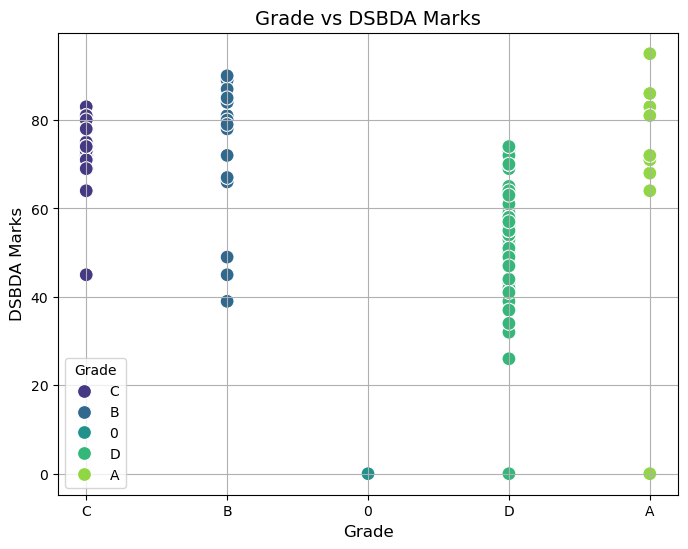

In [41]:
df['Grade'] = df['Grade'].astype(str)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Grade', y='DSBDA', hue='Grade', palette='viridis', s=100)
plt.title('Grade vs DSBDA Marks', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('DSBDA Marks', fontsize=12)
plt.grid(True)
plt.show()
